In [1]:
import numpy as np
import pandas as pd
from itertools import combinations

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
initial_data = pd.read_excel(r"Variance.xlsx") #, sheet_name="Main"

In [5]:
initial_data

,Sales Office,Channel,Sub Trade Channel,Direct/Indirect,Material,Description,Category,SS/MS,Group2,q_1,q_0,p_1,p_0
0,Central Region,AT Work,Other Business And P,Direct,2148201,250 CAN X6 COKE COFFEE NS AMUA,SSD,SS,Coke Functional,0.00,0.04,"3,214.21","4,390.35"
1,Central Region,AT Work,Other Business And P,Direct,2197801,250 CAN X6 COKE COFFEE CARAMEL NS AM,SSD,SS,Coke Functional,0.00,0.47,"3,214.21","4,390.35"
2,Central Region,AT Work,Other Business And P,Direct,1230802,250 RGB X24 FANTA EXOTIC NB AM,SSD,SS,RGB,0.00,0.01,"2,565.07","2,419.89"
3,Central Region,AT Work,Other Business And P,Direct,1713204,250 RGB X24 SPRITE FRESH AM,SSD,SS,RGB,0.84,5.56,"2,565.07","2,419.89"
4,Central Region,AT Work,Other Business And P,Direct,1927601,250 RGB X24 FANTA C ORANGE LOW SUGAR AM,SSD,SS,RGB,3.08,41.61,"2,565.07","2,419.89"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6910,KA,Wholesaler,Other All Others,Indirect,1888005,500 PET X12 FUZE TEA PEACH-ROSE AM,Tea,SS,TEA PETs,0.94,0.00,"2,961.86","3,091.14"
6911,KA,Wholesaler,Other All Others,Indirect,1896504,500 PET X12 FUZE TEA FOR-FRUIT-HIB AM,Tea,SS,TEA PETs,0.23,0.00,"2,961.86","3,091.14"
6912,KA,Wholesaler,Other All Others,Indirect,202660,250 CAN X6 BURN ORIGINAL AM,Energy,SS,Burn,0.03,0.00,"9,971.96","6,420.36"
6913,KA,Wholesaler,Other All Others,Indirect,2268303,250 CANX6 BURN DARK ENERGY AM,Energy,SS,Burn,0.41,0.00,"9,971.96","6,420.36"


In [6]:
def get_mix_fields(df):
    print(pd.DataFrame(df.columns[:-4], columns=["Field"]))
    m_fields = []
    i = 1
    while True:
        inp = input("enter mix " + str(i) + " field number. If no such mix exists, enter -1\n")
        try:
            inp = int(inp)
        except:
            print("input should be an integer between -1 and ", df.columns.shape[0] - 5, "\n")
            continue
        if inp == -1:
            break
        elif inp < 0 or inp > df.columns.shape[0] - 5:
            print("input should be an integer between -1 and ", df.columns.shape[0] - 5, "\n")
        elif inp in m_fields:
            print("The value is already in inputs", "\n")
        else:
            m_fields.append(inp)
            i += 1
    print(df.columns[m_fields])
    return m_fields

In [7]:
mix_fields_index = get_mix_fields(initial_data)

               Field
0       Sales Office
1            Channel
2  Sub Trade Channel
3    Direct/Indirect
4           Material
5        Description
6           Category
7              SS/MS
8             Group2
Index(['Sales Office', 'Direct/Indirect', 'Category', 'SS/MS', 'Group2'], dtype='object')


In [8]:
grouped_data = initial_data.groupby(initial_data.columns[mix_fields_index].tolist()).agg(sum)[['q_1', 'q_0']]
grouped_data.index.names = ["m" + str(l) for l in range(len(mix_fields_index))]
grouped_data.columns = ["t_" + str(grouped_data.index.names[-1]) + "_1", "t_" + str(grouped_data.index.names[-1]) + "_0"]

In [9]:
grouped_data["t_q_1"] = grouped_data.iloc[:, 0].sum()
grouped_data["t_q_0"] = grouped_data.iloc[:, 1].sum()

In [10]:
for i in range(1, len(grouped_data.index.names)):
    grouped_data["t_" + str(grouped_data.index.names[i - 1]) + "_1"] = grouped_data.apply(lambda x: grouped_data.loc[x.name[: i], x.index[0]].sum(), axis=1)
    grouped_data["t_" + str(grouped_data.index.names[i - 1]) + "_0"] = grouped_data.apply(lambda x: grouped_data.loc[x.name[: i], x.index[1]].sum(), axis=1)

In [11]:
grouped_data = (grouped_data[grouped_data.columns.to_list()[2:] + grouped_data.columns.to_list()[:2]]).copy()

In [12]:
grouped_data["d_q_%"] = grouped_data["t_q_1"] / grouped_data["t_q_0"] - 1

In [13]:
grouped_data

t_q_1      t_q_0  \
m0             m1       m2     m3 m4                                      
Central Region Direct   Energy SS Burn            373,460.20 347,080.47   
                                  Coke Energy     373,460.20 347,080.47   
                        Juice  MS Dobriy 1l       373,460.20 347,080.47   
                                  Dobriy 1l Juice 373,460.20 347,080.47   
                                  Juice 2l        373,460.20 347,080.47   
...                                                      ...        ...   
KA             Indirect Tea    SS TEA CANs        373,460.20 347,080.47   
                                  TEA PETs        373,460.20 347,080.47   
                        Water  MS Water 1l        373,460.20 347,080.47   
                                  Water 2l        373,460.20 347,080.47   
                               SS Water SS        373,460.20 347,080.47   

                                                      t_m0_1     t_m0_0  \
m0             m1       m2     m3 m4                                      
Central Region Direct   Energy SS Burn            149,006.70 135,637.93   
                                  Coke Energy     149,006.70 135,637.93   
                        Juice  MS Dobriy 1l       149,006.70 135,637.93   
                                  Dobriy 1l Juice 149,006.70 135,637.93   
                                  Juice 2l        149,006.70 135,637.93   
...                                                      ...        ...   
KA             Indirect Tea    SS TEA CANs        101,598.47 101,904.91   
                                  TEA PETs        101,598.47 101,904.91   
                        Water  MS Water 1l        101,598.47 101,904.91   
                                  Water 2l        101,598.47 101,904.91   
                               SS Water SS        101,598.47 101,904.91   

                                                     t_m1_1    t_m1_0  \
m0             m1       m2     m3 m4                                    
Central Region Direct   Energy SS Burn            52,612.71 46,417.05   
                                  Coke Energy     52,612.71 46,417.05   
                        Juice  MS Dobriy 1l       52,612.71 46,417.05   
                                  Dobriy 1l Juice 52,612.71 46,417.05   
                                  Juice 2l        52,612.71 46,417.05   
...                                                     ...       ...   
KA             Indirect Tea    SS TEA CANs        13,111.60 11,718.19   
                                  TEA PETs        13,111.60 11,718.19   
                        Water  MS Water 1l        13,111.60 11,718.19   
                                  Water 2l        13,111.60 11,718.19   
                               SS Water SS        13,111.60 11,718.19   

                                                    t_m2_1   t_m2_0   t_m3_1  \
m0             m1       m2     m3 m4                                           
Central Region Direct   Energy SS Burn               66.91    27.65    66.91   
                                  Coke Energy        66.91    27.65    66.91   
                        Juice  MS Dobriy 1l       5,584.68 3,503.17 3,075.64   
                                  Dobriy 1l Juice 5,584.68 3,503.17 3,075.64   
                                  Juice 2l        5,584.68 3,503.17 3,075.64   
...                                                    ...      ...      ...   
KA             Indirect Tea    SS TEA CANs           72.71   136.49    72.71   
                                  TEA PETs           72.71   136.49    72.71   
                        Water  MS Water 1l          182.83   285.86    36.44   
                                  Water 2l          182.83   285.86    36.44   
                               SS Water SS          182.83   285.86   146.40   

                                                    t_m3_0   t_m4_1  t_m4_0  \
m0             m1       m2     m3

In [14]:
def delta(df, i):
    return df.iloc[:, i] / df.iloc[:, i - 2] * df.iloc[:, i - 1] / df.iloc[:, i + 1] - 1

In [15]:
for i in range(len(grouped_data.index.names)):
    grouped_data["d_" + str(grouped_data.index.names[i]) + "_%"] = delta(grouped_data, 2 * (i + 1))
    grouped_data.fillna(-1, inplace=True)

In [16]:
grouped_data

t_q_1      t_q_0  \
m0             m1       m2     m3 m4                                      
Central Region Direct   Energy SS Burn            373,460.20 347,080.47   
                                  Coke Energy     373,460.20 347,080.47   
                        Juice  MS Dobriy 1l       373,460.20 347,080.47   
                                  Dobriy 1l Juice 373,460.20 347,080.47   
                                  Juice 2l        373,460.20 347,080.47   
...                                                      ...        ...   
KA             Indirect Tea    SS TEA CANs        373,460.20 347,080.47   
                                  TEA PETs        373,460.20 347,080.47   
                        Water  MS Water 1l        373,460.20 347,080.47   
                                  Water 2l        373,460.20 347,080.47   
                               SS Water SS        373,460.20 347,080.47   

                                                      t_m0_1     t_m0_0  \
m0             m1       m2     m3 m4                                      
Central Region Direct   Energy SS Burn            149,006.70 135,637.93   
                                  Coke Energy     149,006.70 135,637.93   
                        Juice  MS Dobriy 1l       149,006.70 135,637.93   
                                  Dobriy 1l Juice 149,006.70 135,637.93   
                                  Juice 2l        149,006.70 135,637.93   
...                                                      ...        ...   
KA             Indirect Tea    SS TEA CANs        101,598.47 101,904.91   
                                  TEA PETs        101,598.47 101,904.91   
                        Water  MS Water 1l        101,598.47 101,904.91   
                                  Water 2l        101,598.47 101,904.91   
                               SS Water SS        101,598.47 101,904.91   

                                                     t_m1_1    t_m1_0  \
m0             m1       m2     m3 m4                                    
Central Region Direct   Energy SS Burn            52,612.71 46,417.05   
                                  Coke Energy     52,612.71 46,417.05   
                        Juice  MS Dobriy 1l       52,612.71 46,417.05   
                                  Dobriy 1l Juice 52,612.71 46,417.05   
                                  Juice 2l        52,612.71 46,417.05   
...                                                     ...       ...   
KA             Indirect Tea    SS TEA CANs        13,111.60 11,718.19   
                                  TEA PETs        13,111.60 11,718.19   
                        Water  MS Water 1l        13,111.60 11,718.19   
                                  Water 2l        13,111.60 11,718.19   
                               SS Water SS        13,111.60 11,718.19   

                                                    t_m2_1   t_m2_0   t_m3_1  \
m0             m1       m2     m3 m4                                           
Central Region Direct   Energy SS Burn               66.91    27.65    66.91   
                                  Coke Energy        66.91    27.65    66.91   
                        Juice  MS Dobriy 1l       5,584.68 3,503.17 3,075.64   
                                  Dobriy 1l Juice 5,584.68 3,503.17 3,075.64   
                                  Juice 2l        5,584.68 3,503.17 3,075.64   
...                                                    ...      ...      ...   
KA             Indirect Tea    SS TEA CANs           72.71   136.49    72.71   
                                  TEA PETs           72.71   136.49    72.71   
                        Water  MS Water 1l          182.83   285.86    36.44   
                                  Water 2l          182.83   285.86    36.44   
                               SS Water SS          182.83   285.86   146.40   

                                                    t_m3_0   t_m4_1  t_m4_0  \
m0             m1       m2     m3

In [27]:
initial_data["d_p_%"] = initial_data["p_1"] / initial_data["p_0"] - 1

In [28]:
initial_data = initial_data.merge(grouped_data.iloc[:, -(len(grouped_data.index.names) + 1):], how="left", left_on=tuple(initial_data.columns[mix_fields_index]), right_index=True)

In [29]:
cols = np.array(initial_data.columns[-(len(grouped_data.index.names) + 2) : ]) # 2 is p and q, change if p is in fluenced by more variables
for i in range(2, len(cols) + 1):
    l = list(combinations(range(len(cols)), i))
    for comb in l:
        column_name = "_".join(["d_" + x.split("_")[1] for x in cols[list(comb)].tolist()]) + "_%"
        initial_data[column_name] = initial_data.loc[:, cols[list(comb)]].product(axis=1)
    

In [30]:
initial_data["pq_1"] = initial_data["p_1"] * initial_data["q_1"]
initial_data["pq_0"] = initial_data["p_0"] * initial_data["q_0"]
initial_data["check"] = initial_data.loc[:, 'd_p_%':initial_data.columns[-3]].multiply(initial_data.loc[:, "q_0"], axis=0).multiply(initial_data.loc[:, "p_0"], axis=0).sum(axis=1)

In [31]:
mix_fields_index

[6, 7, 8]

In [32]:
initial_data.columns[mix_fields_index]

Index(['Category', 'SS/MS', 'Group2'], dtype='object')

In [33]:
cat_ch = initial_data.groupby(list(initial_data.columns[mix_fields_index])).agg(sum)[["pq_1", "pq_0", "check"]]
cat_ch["abs"] = cat_ch.iloc[:, 0] - cat_ch.iloc[:, 1]
cat_ch["is_different"] = cat_ch["abs"] - cat_ch["check"]

In [34]:
cat_ch[cat_ch["is_different"].abs() > 1]

,,,pq_1,pq_0,check,abs,is_different
Category,SS/MS,Group2,,,,,


In [35]:
if abs(initial_data["check"].sum() - initial_data["pq_1"].sum() + initial_data["pq_0"].sum()) > 10:
    print("Numbers don't match!!!!!!!!!!")

In [36]:
df = initial_data.loc[:, 'd_p_%':initial_data.columns[-4]].multiply(initial_data.loc[:, "q_0"], axis=0).multiply(initial_data.loc[:, "p_0"], axis=0).sum(axis=0).to_frame()
#df.to_excel("out2.xlsx")
df.loc["pq_0"] = initial_data["pq_0"].sum()
df = df.loc[["pq_0"], :].append(df.loc[df.index != "pq_0", :])
df.columns = ["Effects"]

In [37]:
def show_waterfall(d):
    from matplotlib import pyplot as plt
    import waterfall_chart

    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(20,7.5), 'figure.dpi':400})

    waterfall_chart.plot(d.index, d.iloc[:, 0]/1000000, sorted_value=True, net_label="Total", threshold=0.001)
    y_lim = ((df.iloc[0, :] - df.iloc[1:, :].abs().max() * 1.5) / 10000000).values[0].round().astype(int) * 10
    plt.ylabel("Variance (Million AMD)")
    plt.xlabel("Factors")
    plt.ylim(bottom=y_lim)
    plt.show()

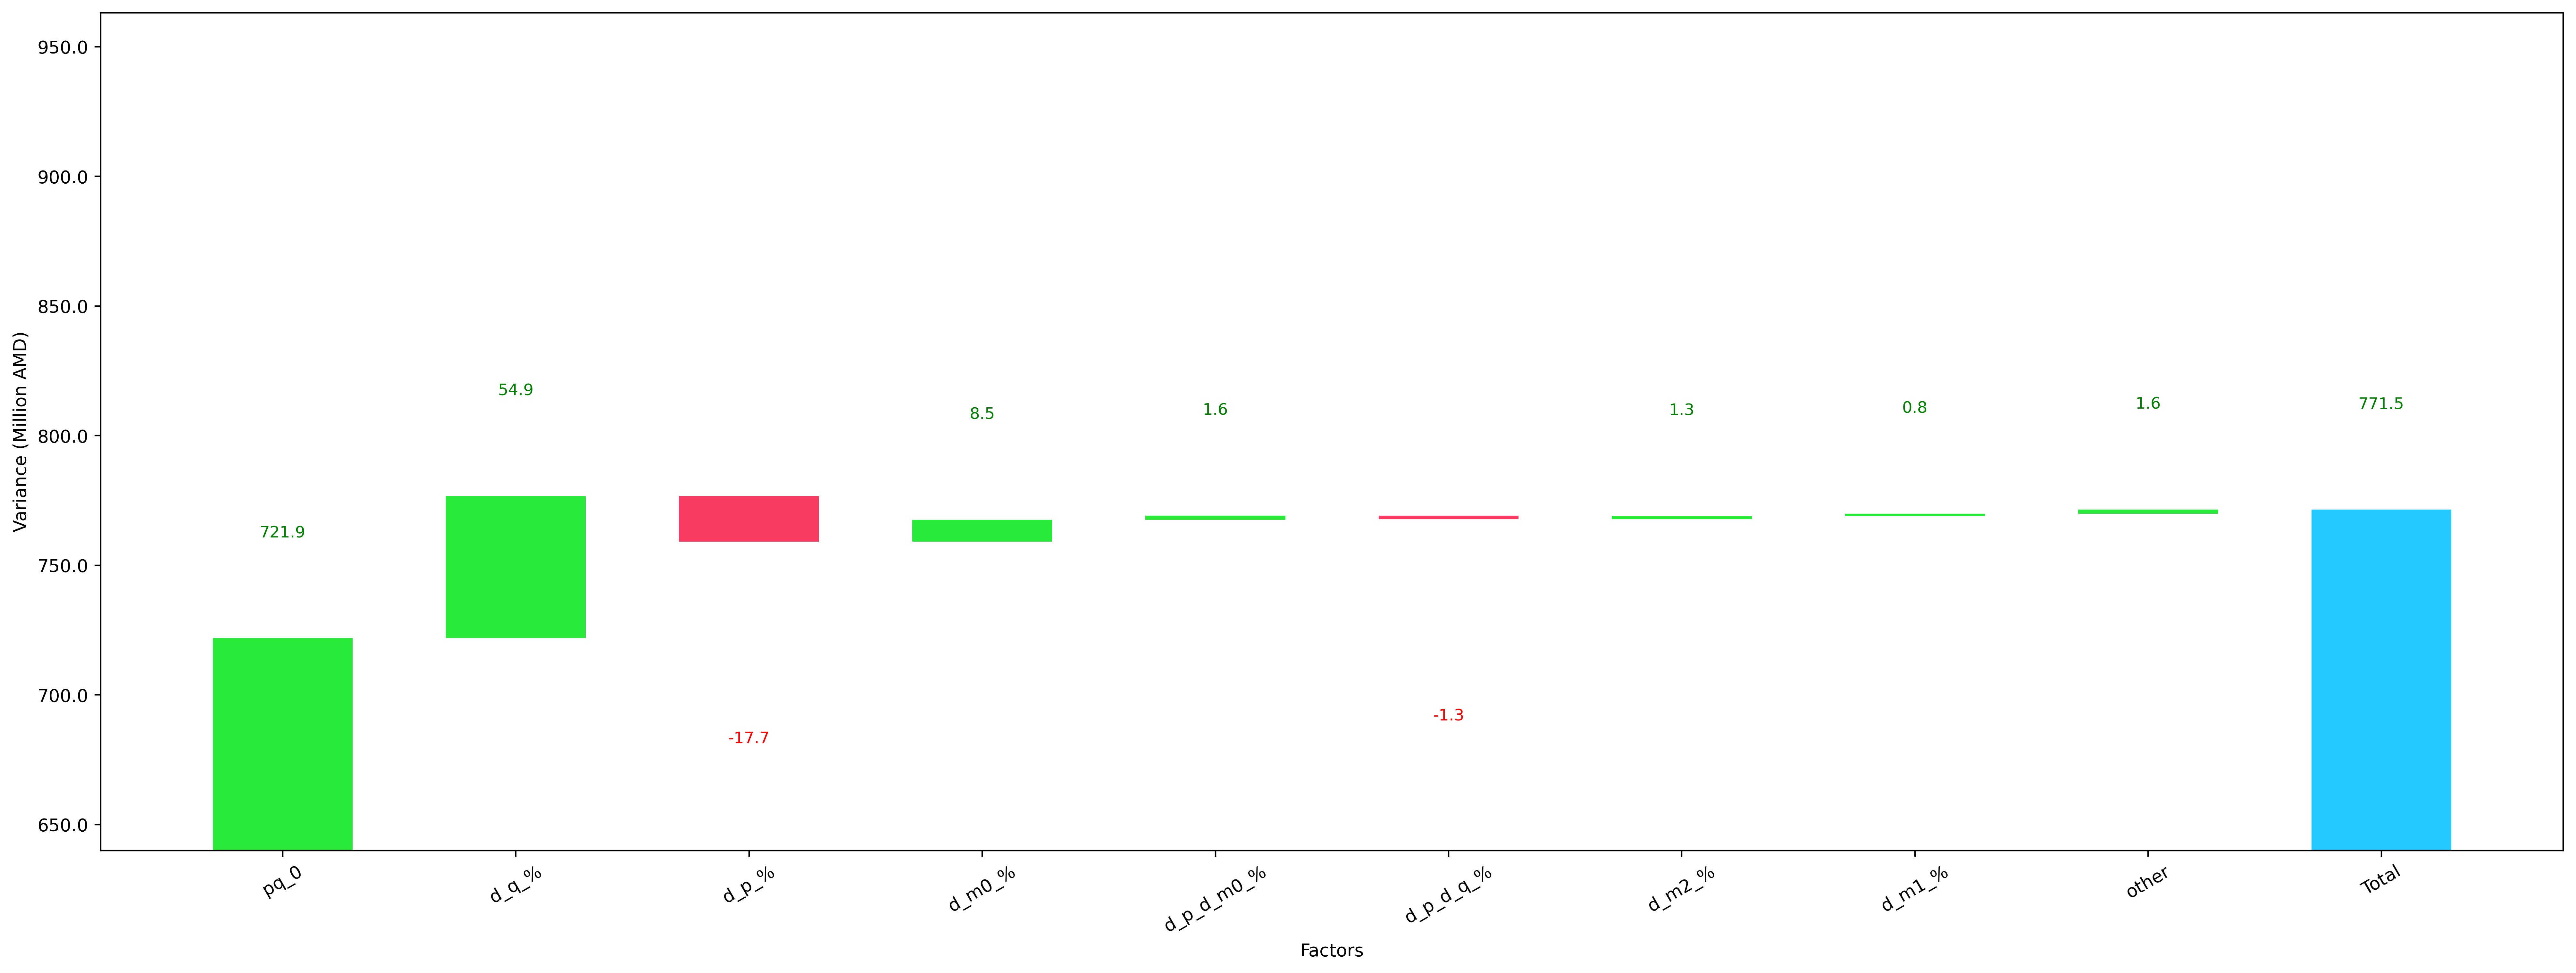

In [38]:
show_waterfall(df)

In [39]:
cat_ch[cat_ch["is_different"].abs() > 1]

,,,pq_1,pq_0,check,abs,is_different
Category,SS/MS,Group2,,,,,


In [40]:
df.to_excel("out2.xlsx")